This notebook is used for some basic exploration on modelled data.

#Importing the data
The following code imports the necessary packages and creates convinient shortcut functions. As well as assures the plots will appear in this notebook within the Out.

In [82]:
from __future__ import division, print_function

import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

from salishsea_tools import (nc_tools, viz_tools)

%matplotlib inline

This will upload the nowcast grid T data from May 4th 2015; temperature, salinity and sea surface height.

In [83]:
filename='/data/dlatorne/MEOPAR/SalishSea/nowcast/04may15/SalishSea_1d_20150504_20150504_grid_T.nc'
f=nc.Dataset(filename)

Below I will create my own shorter variable names to facilitate accessing these variables.

In [96]:
nc_tools.show_variables(f)
lons=f.variables['nav_lon']
lats=f.variables['nav_lat']
sal=f.variables['vosaline']
temp=f.variables['votemper']
ssh=f.variables['sossheig']
dep=f.variables['deptht']

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


Making a plot of the (average) sea surface height of May 4th as a colour mesh

<matplotlib.colorbar.Colorbar instance at 0x7f3280172c68>

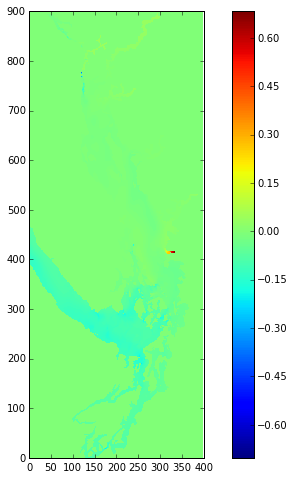

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh[0])
fig.colorbar(mesh)

##Making a Complete Colour Mesh Plot 

Masking the land by creating a numpy masked array which masks the values that are zero within the ssh array and adding labels and titles.

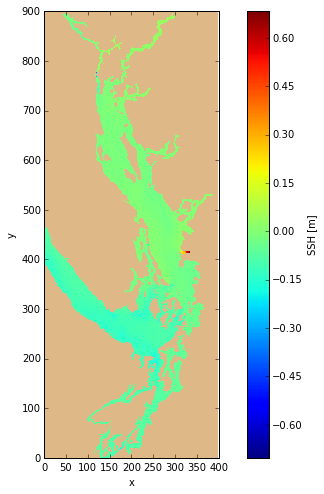

In [86]:
ssh1=np.ma.masked_values(ssh[0],0)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh1, cmap=cmap)
cbar=fig.colorbar(mesh)

ax.set_xlabel('x')
ax.set_ylabel('y')
cbar.set_label('SSH [{units}]'.format(units=ssh.units))


From this map we notice the sea surface height is similar, approx. 0m everywhere but at the Fraser River where it is up to approximate .60m higher. The sea surface height is slightly lower in the Juan da Fuca straight  and as we move south. 

Now I will try with temperature at the surface and I will use the longitude and latitude instead of indices.

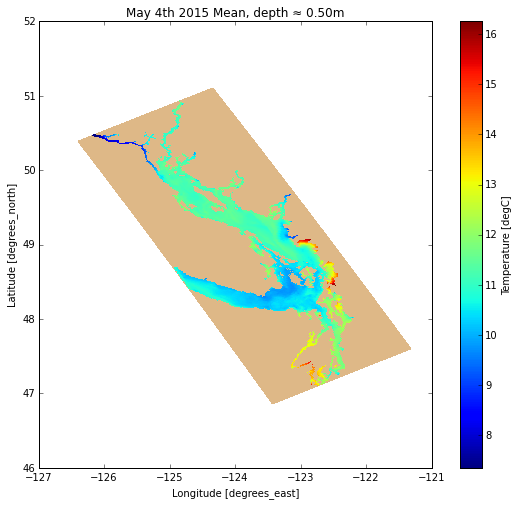

In [97]:

temp1=np.ma.masked_values(temp[0,0,:,:],0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lons[:], lats[:], temp1, cmap=cmap)
cbar=fig.colorbar(mesh)


ax.set_xlabel('{lon} [{units}]'.format(lon=lons.long_name, units=lons.units))
ax.set_ylabel('{lat} [{units}]'.format(lat=lats.long_name, units=lats.units))
cbar.set_label('{label} [{units}]'.format(label=temp.long_name.title(), units=temp.units))
ax.set_title(u'May 4th 2015 Mean, depth \u2248 {d:.2f}{z.units}'.format(d=dep[0], z=dep))